In [1]:
import pandas as pd
import pydataset
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import plotly.express as px
import geopandas as gpd
import geoplot as gplt

In [2]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
full_covid_stats = pd.read_csv(url, parse_dates = ['date'])
print(full_covid_stats.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')


In [3]:
covid = full_covid_stats[['iso_code','location', 'date', 'new_cases_smoothed_per_million',
                          'total_cases_per_million', 'new_deaths_smoothed_per_million',
                          'total_deaths_per_million', 'total_tests_per_thousand',
                          'new_tests_smoothed_per_thousand', 'tests_per_case']]
covid

,iso_code,location,date,new_cases_smoothed_per_million,total_cases_per_million,new_deaths_smoothed_per_million,total_deaths_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,tests_per_case
0,ABW,Aruba,2020-03-13,NaN,18.733,NaN,0.0,NaN,NaN,NaN
1,ABW,Aruba,2020-03-19,2.676,NaN,0.0,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-20,2.676,37.465,0.0,0.0,NaN,NaN,NaN
3,ABW,Aruba,2020-03-21,2.676,NaN,0.0,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-22,2.676,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
49873,NaN,International,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49874,NaN,International,2020-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49875,NaN,International,2020-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49876,NaN,International,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
world = gpd.read_file(gplt.datasets.get_path('world'))
world

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066, 62.98466 35.40404, 63.19354 35.85717, ..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6.62265, 16.86019 -7.22230, 17.09000 -7.5..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509, 20.60518 41.08623, 21.02004 40.84273, ..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407, 51.79439 24.01983, 52.57708 24.17744, ..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000 -55.25000, -66.95992 -54.89681, -67.562..."
...,...,...,...
175,PSE,West Bank,"POLYGON ((35.54566 32.39399, 35.54525 31.78251, 35.39756 31.48909, 34.92741 31.35344, ..."
176,YEM,Yemen,"POLYGON ((53.10857 16.65105, 52.38521 16.38241, 52.19173 15.93843, 52.16817 15.59742, ..."
177,ZAF,South Africa,"POLYGON ((31.52100 -29.25739, 31.32556 -29.40198, 30.90176 -29.90996, 30.62281 -30.423..."
178,ZMB,Zambia,"POLYGON ((32.75937 -9.23060, 33.23139 -9.67672, 33.48569 -10.52556, 33.31531 -10.79655..."


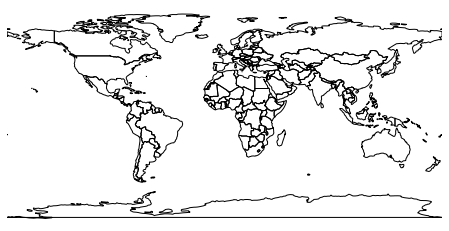

In [5]:
import geoplot.crs as gcrs # (projections)
gplt.polyplot(world, figsize=(8, 4))

In [6]:
covid_world = (world.merge(covid, left_on='id', right_on='iso_code'))
covid_world = covid_world.drop(['id','location','iso_code'], axis=1)
covid_world

,name,geometry,date,new_cases_smoothed_per_million,total_cases_per_million,new_deaths_smoothed_per_million,total_deaths_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,tests_per_case
0,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066, 62.98466 35.40404, 63.19354 35.85717, ...",2019-12-31,NaN,0.000,NaN,0.000,NaN,NaN,NaN
1,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066, 62.98466 35.40404, 63.19354 35.85717, ...",2020-01-01,NaN,0.000,NaN,0.000,NaN,NaN,NaN
2,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066, 62.98466 35.40404, 63.19354 35.85717, ...",2020-01-02,NaN,0.000,NaN,0.000,NaN,NaN,NaN
3,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066, 62.98466 35.40404, 63.19354 35.85717, ...",2020-01-03,NaN,0.000,NaN,0.000,NaN,NaN,NaN
4,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066, 62.98466 35.40404, 63.19354 35.85717, ...",2020-01-04,NaN,0.000,NaN,0.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
40854,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...",2020-10-09,0.971,534.955,0.010,15.407,NaN,NaN,NaN
40855,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...",2020-10-10,1.307,537.848,0.010,15.407,NaN,NaN,NaN
40856,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...",2020-10-11,1.201,538.925,0.019,15.475,NaN,NaN,NaN
40857,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...",2020-10-12,1.211,538.992,0.019,15.475,NaN,NaN,NaN


In [7]:
import ipywidgets as widgets
import datetime
dates = [datetime.date(2020, 1, 7) + 
         datetime.timedelta(days=k) for k in range(1000)]
dates = [date for date in dates if date < datetime.date.today()]
datewidget = widgets.SelectionSlider(options=[(i, i) for i in dates],
                                     value=datetime.date(2020, 1, 7),
                                     disabled=False,
                                     layout=widgets.Layout(width="75%"))

In [8]:
# Lastly, we use the `interact` function to create an output area which incorporates both the 
# slider and the resulting graph:
from ipywidgets import interact

def make_map(date):
    date_str = datetime.datetime.strftime(date, "%m-%d-%y")
    return gplt.choropleth(
        covid_world.query(f"date == '{date_str}'"),
        hue='total_deaths_per_million',
        cmap='Reds',
        legend=True,
        figsize=(20, 8)
    )

interact(make_map, date=datewidget)

interactive(children=(SelectionSlider(description='date', layout=Layout(width='75%'), options=((datetime.date(…

<function __main__.make_map(date)>

In [9]:
covid_world

,name,geometry,date,new_cases_smoothed_per_million,total_cases_per_million,new_deaths_smoothed_per_million,total_deaths_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,tests_per_case
0,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066, 62.98466 35.40404, 63.19354 35.85717, ...",2019-12-31,NaN,0.000,NaN,0.000,NaN,NaN,NaN
1,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066, 62.98466 35.40404, 63.19354 35.85717, ...",2020-01-01,NaN,0.000,NaN,0.000,NaN,NaN,NaN
2,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066, 62.98466 35.40404, 63.19354 35.85717, ...",2020-01-02,NaN,0.000,NaN,0.000,NaN,NaN,NaN
3,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066, 62.98466 35.40404, 63.19354 35.85717, ...",2020-01-03,NaN,0.000,NaN,0.000,NaN,NaN,NaN
4,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066, 62.98466 35.40404, 63.19354 35.85717, ...",2020-01-04,NaN,0.000,NaN,0.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
40854,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...",2020-10-09,0.971,534.955,0.010,15.407,NaN,NaN,NaN
40855,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...",2020-10-10,1.307,537.848,0.010,15.407,NaN,NaN,NaN
40856,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...",2020-10-11,1.201,538.925,0.019,15.475,NaN,NaN,NaN
40857,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.15157, 30.32288 -22.27161, 29.83904 -22.102...",2020-10-12,1.211,538.992,0.019,15.475,NaN,NaN,NaN
